<a href="https://colab.research.google.com/github/palaciosalondra584-dev/Inteligencia_Artificial/blob/main/CNN/Clasificaci%C3%B3n_de_digitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Utilizamos la función load_digits desde la librería scikit-learn, que sirve para cargar un conjunto de imágenes de números escritos a mano y lo guardamos en la variable digits

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()


####Mostramos las partes principales del conjunto de datos

In [2]:
digits.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

####Imprimimos que son los datos,cuantas imagenes hay , que representa y como estan organizadas.

In [3]:
print(digits.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

####Guaramos el 20 en una variable llamada index

In [4]:
index = 20


####Guardamos en "image" la imagen numero 20 que guardamos arribita

In [5]:
image = digits.images[index]
label = digits.target[index]



####Imprime la matriz de la imagen, numeros que representan que tan oscuro o claro es cada píxel del número dibujado.

In [6]:
print(image)


[[ 0.  0.  3. 13. 11.  7.  0.  0.]
 [ 0.  0. 11. 16. 16. 16.  2.  0.]
 [ 0.  4. 16.  9.  1. 14.  2.  0.]
 [ 0.  4. 16.  0.  0. 16.  2.  0.]
 [ 0.  0. 16.  1.  0. 12.  8.  0.]
 [ 0.  0. 15.  9.  0. 13.  6.  0.]
 [ 0.  0.  9. 14.  9. 14.  1.  0.]
 [ 0.  0.  2. 12. 13.  4.  0.  0.]]


#### Importa matplotlib ya que esto ayuda a hacer graficos o imagenes
####Creamos un lienzo de 3*3 en colores "inferno", y muestra la imagen en pantalla

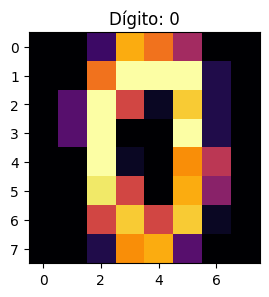

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.inferno)
plt.title(f'Dígito: {label}')
plt.show()


####Importamos la libreria tensorflow
####Y la funcion que divide los datos en entrenamiento y prueba
####Importa una función para convertir etiquetas en formato “one-hot” (una forma especial de representar categorías con ceros y unos).
####80% para entrenar y 20% para probar
####Transforma las etiquetas (0 a 9) en vectores con 10 posiciones, donde el número correcto tiene un 1 y los demás 0.Por ejemplo, el 3 se convierte en [0,0,0,1,0,0,0,0,0,0].

In [8]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target,
    test_size=0.2, random_state=42
)

# One-hot encode the target variable
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


####Imprimimos las imagenes en el entrenamiento
####Imprimimos el conjunto prueba, es decir 1437 imagenes que entrenar cada uan con 64 valores es decir de (8*8) y 360 imagenes para probar con 64 valores cada una

In [9]:
print(X_train.shape)
print(X_test.shape)


(1437, 64)
(360, 64)


####Imprimimos la matriz 8*8 donde cada numero indica l intensidad de pixeles

In [10]:
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
print(reshaped_tensor)


tf.Tensor(
[[ 0.  0.  3. 14.  1.  0.  0.  0.]
 [ 0.  0. 12. 12.  0.  0.  0.  0.]
 [ 0.  3. 16.  6.  0.  0.  0.  0.]
 [ 0.  5. 16.  2.  0.  0.  0.  0.]
 [ 0.  6. 16.  2.  5.  2.  0.  0.]
 [ 0.  4. 16.  2. 12. 15.  2.  0.]
 [ 0.  1. 14. 13.  2. 13. 11.  0.]
 [ 0.  0.  3. 11. 16. 13.  4.  0.]], shape=(8, 8), dtype=float64)


####Importamos herramientas para escalar o normalizar los datos, es decir, ajustar los valores para que estén en rangos más convenientes para entrenar modelos
####Creamos un “escalador estándar” que transforma los datos para que tengan media 0 y desviación estándar 1.
####En pocas palabras: esto hace que los números de los píxeles estén en una escala uniforme, lo que ayuda a que la red neuronal aprenda mejor.

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

####Convertimos la primera imagen normalizada de vector (64 valores) a matriz 8*8, recuperando su forma original de píxeles.
####Multiplicamos cada valor por 100, lo redondea hacia abajo (floor) y lo divide por 100, en palabras simples: limita los decimales a 2 para que la matriz sea más fácil de leer.
####Imprimimos la matriz 8*8 con los valores normalizados

In [12]:
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
# Redondeamos para tener una mejor visualizacion
reshaped_tensor =  tf.floor(reshaped_tensor * 100) / 100
print(reshaped_tensor)

tf.Tensor(
[[ 0.   -0.35 -0.47  0.5  -2.55 -1.04 -0.41 -0.14]
 [-0.07 -0.62  0.3   0.   -2.19 -1.36 -0.53 -0.14]
 [-0.05  0.12  1.08 -0.2  -1.17 -1.28 -0.56 -0.12]
 [-0.04  0.86  1.13 -1.17 -1.61 -1.29 -0.63 -0.05]
 [ 0.    1.09  1.34 -1.13 -0.91 -1.14 -0.82  0.  ]
 [-0.07  0.82  1.39 -0.83  0.69  1.17 -0.34 -0.1 ]
 [-0.04  0.15  1.14  0.64 -1.43  0.68  1.47 -0.22]
 [-0.03 -0.31 -0.5  -0.25  0.84  1.05  0.45 -0.2 ]], shape=(8, 8), dtype=float64)


####convertimos las iamgenes de entrenamiento y de prueba a su forma original de la forma 8*8

In [13]:
# Redimensionar el tensor a la forma (total, 8, 8)
X_train = tf.reshape(X_train, (X_train.shape[0], 8, 8))
X_test = tf.reshape(X_test, (X_test.shape[0], 8, 8))

####Traemos las herramientas necesarias para crear una red neuronal convoluciona,  en pocas palabras es una CNN pequeña que toma imágenes 8*8 de dígitos, extrae patrones y predice qué número es.

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Crear el modelo de CNN
model = Sequential([
    Conv2D(32, kernel_size=(3, 3),
        activation='relu',
        input_shape=(8, 8, 1)
    ),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


####Importamos el optimizador Adam, que se encarga de ajustar los pesos de la red neuronal durante el entrenamiento para minimizar errores
####Definimos la tasa de aprendizaje, es decir, qué tan grandes son los pasos que da la red al actualizar los pesos para luego entrenar al modelo

In [15]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

#### le decimos a la red cómo aprender y cómo evaluar su rendimiento

In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

####Colocamos lo datos de entrenamiento y colocamos las epocas en este caso 30 y dividimos los datos en un grupo de imagen en 32 para actualizar los pesos, guardando la informacion de perdida y exactitud

In [17]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4051 - loss: 1.9787 - val_accuracy: 0.8611 - val_loss: 0.9718
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9069 - loss: 0.6781 - val_accuracy: 0.8889 - val_loss: 0.4237
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9372 - loss: 0.2906 - val_accuracy: 0.9340 - val_loss: 0.3017
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9613 - loss: 0.1746 - val_accuracy: 0.9375 - val_loss: 0.2300
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9714 - loss: 0.1289 - val_accuracy: 0.9375 - val_loss: 0.1866
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9818 - loss: 0.0942 - val_accuracy: 0.9549 - val_loss: 0.1544
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9849 - loss: 0.0742 - val_accuracy: 0.9479 - val_loss: 0.1333
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9925 - loss: 0.0535 - val_accuracy: 0.9583 - val_loss

####Importamos matplotlib.pyplot para generar una grafica para poder visualizar como cambio la perdida en los datos de entrenamento para ver si el modelo esta aprendiendo o no

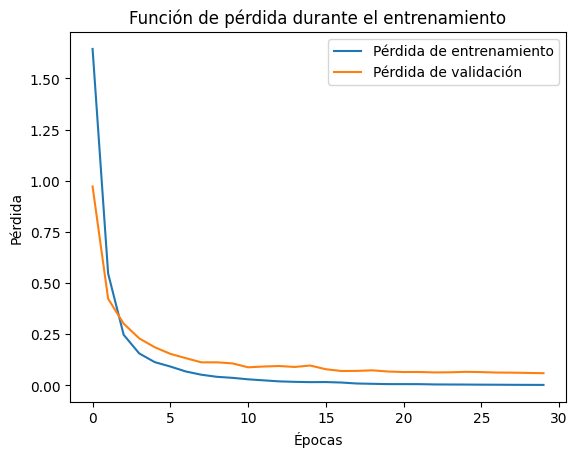

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


####Evalúa el modelo con los datos de prueba que nunca vio antes, devolviendo:
####loss:Qué tan bien se ajusta a los datos de prueba (error).
####accuracy: Qué porcentaje de predicciones fueron correctas.

In [19]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9907 - loss: 0.0371  
Loss: 0.04307189956307411, Accuracy: 0.9861111044883728


####Creamos una matriz de confusion que muestra cuántas veces el modelo acertó o confundió cada dígito y la sensibilidad

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert y_test back to multiclass format
y_test_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


####Importamos seaborn y matplotlib para generar un grafico como mapa de calor, en color azul, colocamos etiquetas los ejes y el título, y muestra el gráfico de si esta bien o mal donde un valor cercano a 1 es correcto

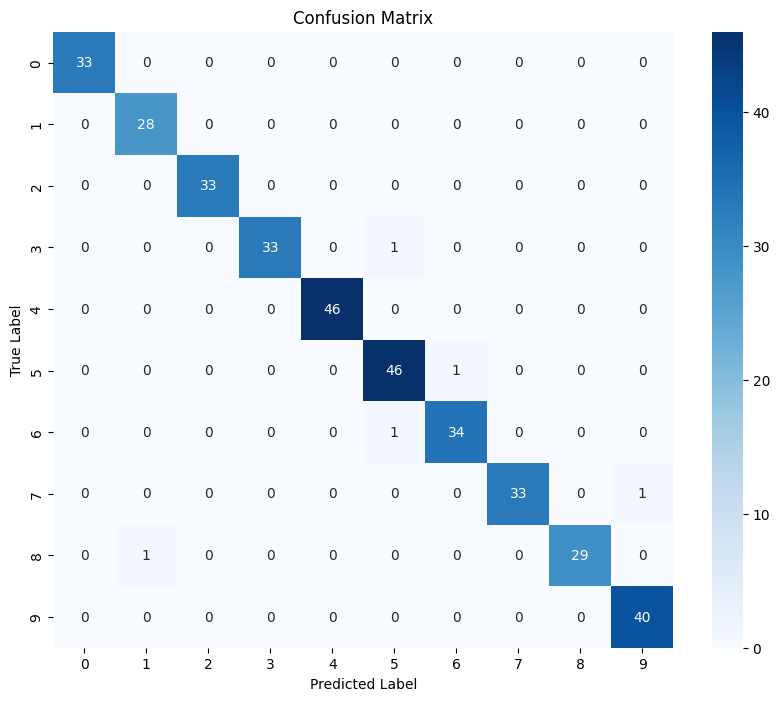

Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 1.0
Class 2: 1.0
Class 3: 0.9705882352941176
Class 4: 1.0
Class 5: 0.9787234042553191
Class 6: 0.9714285714285714
Class 7: 0.9705882352941176
Class 8: 0.9666666666666667
Class 9: 1.0


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la matriz de confusión como una imagen de colores
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Mostrar la sensibilidad (recall) para cada clase
print('Sensitivity (Recall) for each class:')
for i in range(10):
    print(f'Class {i}: {sensitivity[i]}')

####Descargamos la imagen que queremos transformar la cargamos y copeamos la ruta y la imprimimos en escala de grises

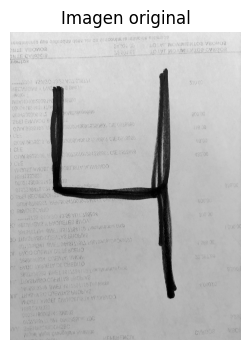

In [23]:
from PIL import Image
import matplotlib.pyplot as plt

# Cambia por el nombre de tu archivo
ruta = "/content/mi_numero.png"
# Escala de grises ("L")
img = Image.open(ruta).convert("L")

# mostrar la imagen
plt.figure(figsize=(4, 4))
plt.imshow(img, cmap="gray")
plt.title("Imagen original")
plt.axis("off")
plt.show()


####Este bloque prepara la imagen del dígito para que pueda ser ingresada al modelo y la visualises en escala de colores "inferno" de 8*8 pixeles

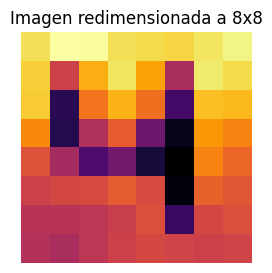

In [24]:
import matplotlib.pyplot as plt

# redimensionar a 8x8
img_resized = img.resize((8, 8), Image.Resampling.LANCZOS)

# mostrar imagen
plt.figure(figsize=(3, 3))
plt.imshow(img_resized, cmap="inferno")
plt.title("Imagen redimensionada a 8x8")
plt.axis("off")
plt.show()

# opcional, guardamos la imagen si es necesario
img_resized.save("imagen_8x8.png")


####Redimensionamos a un numero tipo flotante en este caso 32, en escala de valores de 0 a 255 a 0 a 16 es decir se adapta la imagen al mismo formato que usó el modelo para entrenarse

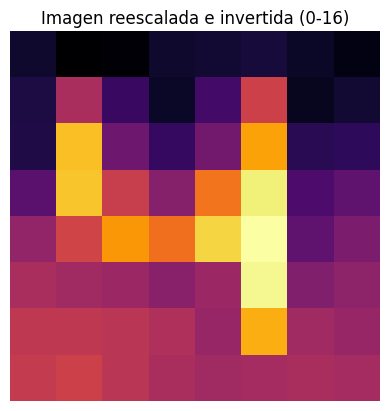

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# reescalar de 0-255 a 0-16 e invertir (fondo negro = 0)
img_array = np.array(img_resized).astype("float32")
img_array = 16 - (img_array / 255 * 16)

# mostrar imagen
plt.imshow(img_array, cmap="inferno")
plt.title("Imagen reescalada e invertida (0-16)")
plt.axis("off")
plt.show()


####Preparamos la imagen para que el modelo pueda leerla y clasificarla correctamente

In [26]:
from sklearn.preprocessing import StandardScaler

# normalizar
scaler = StandardScaler()
img_flat = img_array
img_scaled = scaler.fit_transform(img_flat)

# Dar forma (1,8,8) que es el input del modelo
img_tensor = img_scaled.reshape(1, 8, 8)

####Este bloque usa la red neuronal entrenada para adivinar qué número está en tu imagen en este caso 4

In [27]:
pred = model.predict(img_tensor)
digit = np.argmax(pred)
print("Predicción:", digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicción: 4
